In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt




In [2]:
def create_dropout_model():
    base_model = keras.applications.VGG16(
        include_top=False, weights='imagenet', input_shape=(32, 32, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_bnn_model():
    base_model = keras.applications.ResNet50(
        include_top=False, weights='imagenet', input_shape=(32, 32, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model




In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.repeat(x_train[..., np.newaxis], 3, -1)
x_test = np.repeat(x_test[..., np.newaxis], 3, -1)
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))
x_train = keras.applications.vgg16.preprocess_input(x_train)
x_test = keras.applications.vgg16.preprocess_input(x_test)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def train_models(model_fn, num_models):
    models = []
    for i in range(num_models):
        model = model_fn()
        model.fit(x_train, y_train, epochs=5, verbose=0)
        models.append(model)
    return models

num_models = 5

dropout_models = train_models(create_dropout_model, num_models)
bnn_models = train_models(create_bnn_model, num_models)

def evaluate_models(models):
    accuracies = []
    for model in models:
        _, accuracy = model.evaluate(x_test, y_test, verbose=0)
        accuracies.append(accuracy)
    return accuracies



94765736/94765736 [==============================] - 0s 0us/step


In [7]:
dropout_accuracies = evaluate_models(dropout_models)
bnn_accuracies = evaluate_models(bnn_models)

print("Dropout Model Accuracies:", dropout_accuracies)
print("BNN Model Accuracies:", bnn_accuracies)
print("Average Dropout Accuracy:", np.mean(dropout_accuracies))
print("Average BNN Accuracy:", np.mean(bnn_accuracies))


Dropout Model Accuracies: [0.9375, 0.9340999722480774, 0.9380000233650208, 0.9397000074386597, 0.9366999864578247]
BNN Model Accuracies: [0.9469000101089478, 0.9474999904632568, 0.9437999725341797, 0.9459999799728394, 0.9484999775886536]
Average Dropout Accuracy: 0.9371999979019165
Average BNN Accuracy: 0.9465399861335755


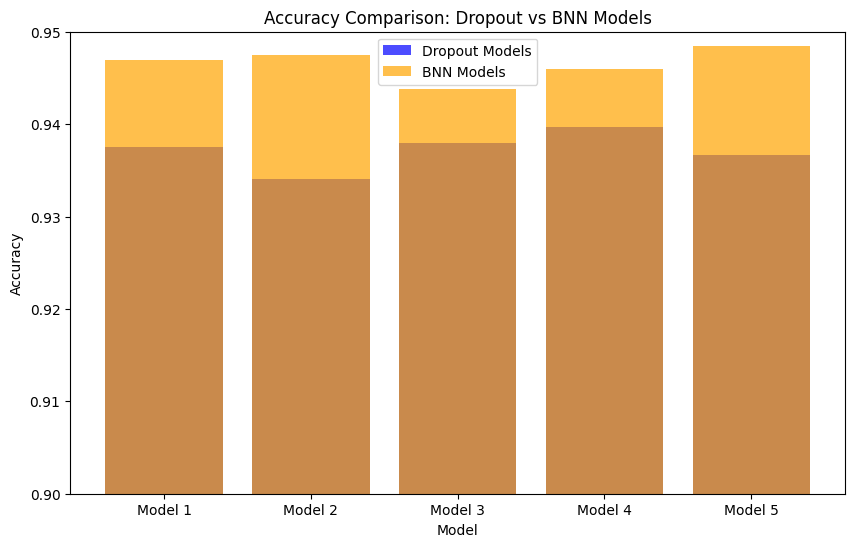

In [8]:
def plot_accuracies(dropout_accuracies, bnn_accuracies):
    models = ['Model {}'.format(i+1) for i in range(len(dropout_accuracies))]

    plt.figure(figsize=(10, 6))
    plt.bar(models, dropout_accuracies, color='blue', alpha=0.7, label='Dropout Models')
    plt.bar(models, bnn_accuracies, color='orange', alpha=0.7, label='BNN Models')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison: Dropout vs BNN Models')
    plt.legend()
    plt.ylim([0.9, 0.95])
    plt.show()

plot_accuracies(dropout_accuracies, bnn_accuracies)
